In [22]:
import pandas as pd
import numpy as np
from datetime import datetime

In [382]:
df = pd.read_csv("data.csv")

In [7]:
df.columns

Index(['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT', 'VORJAHRESWERT',
       'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
       'ZWOELF_MONATE_MITTELWERT'],
      dtype='object')

In [383]:
df = df.loc[df["MONAT"] != "Summe"]
df.shape

(1932, 9)

In [306]:
def f(date_time_str):
   date_time_obj = datetime.strptime(date_time_str[2:], '%y%m')
   return date_time_obj


In [307]:
result = [f(row) for row in df['MONAT']]
#for i in df['MONAT']:
  #df["date"][i]=f(i)
df["date"]=result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [309]:
df1=df[["MONATSZAHL", "AUSPRAEGUNG","date","WERT",]]
df1 = df1.rename(columns={'MONATSZAHL': 'Category', 'AUSPRAEGUNG': 'Type','WERT':'Value'})
df1.head(15)


,Category,Type,date,Value
0,Alkoholunfälle,insgesamt,2022-01-01,NaN
1,Alkoholunfälle,insgesamt,2022-02-01,NaN
2,Alkoholunfälle,insgesamt,2022-03-01,NaN
3,Alkoholunfälle,insgesamt,2022-04-01,NaN
4,Alkoholunfälle,insgesamt,2022-05-01,NaN
5,Alkoholunfälle,insgesamt,2022-06-01,NaN
6,Alkoholunfälle,insgesamt,2022-07-01,NaN
7,Alkoholunfälle,insgesamt,2022-08-01,NaN
8,Alkoholunfälle,insgesamt,2022-09-01,NaN
9,Alkoholunfälle,insgesamt,2022-10-01,NaN


In [75]:
lag_size = (df1['date'].max().date() - df1['date'].min().date()).days
print('Max date from train set: %s' % df1['date'].max().date())
print('Min date from train set: %s' % df1['date'].min().date())
print('Forecast lag size', lag_size)

Max date from train set: 2022-12-01
Min date from train set: 2000-01-01
Forecast lag size 8370


In [ ]:
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['month'] = pd.DatetimeIndex(df['date']).month
df2 =df1.set_index('date')

In [149]:
Total_Per_Type = df1[["Type","Value"]].groupby('Type', as_index=False).sum()
Total_Per_Type

,Type,Value
0,Verletzte und Getötete,151764.0
1,insgesamt,1172293.0
2,mit Personenschäden,111811.0


In [150]:
#Total number of accidents per category
Total_Per_Category = df1[["Category","date","Value"]].groupby('Category', as_index=False) ["Value"].sum()
Total_Per_Category

,Category,Value
0,Alkoholunfälle,16839.0
1,Fluchtunfälle,243363.0
2,Verkehrsunfälle,1175666.0


**the number of accidents in the Alkoholunfälle category per month**

In [151]:
Total_accidents_Per_Category_Month = df1[["Category","date","Value"]].groupby(['Category',"date"]) ["Value"].sum()

Total_accidents_Alkoholunfälle_Month=Total_accidents_Per_Category_Month["Alkoholunfälle"].to_frame().reset_index()
Total_accidents_Alkoholunfälle_Month.head()

,date,Value
0,2000-01-01,115.0
1,2000-02-01,72.0
2,2000-03-01,91.0
3,2000-04-01,104.0
4,2000-05-01,140.0


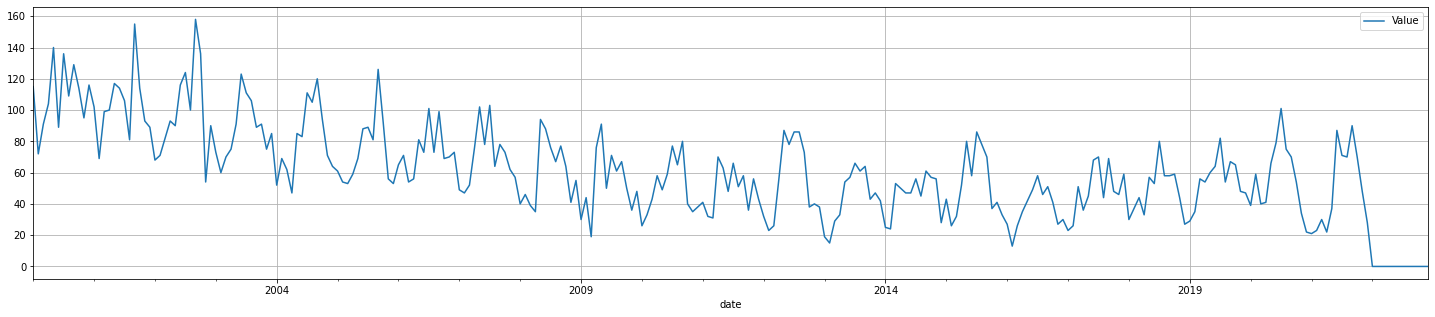

In [152]:
Total_accidents_Alkoholunfälle_Month.plot(x='date', y='Value' ,figsize=(25,5), grid=True)


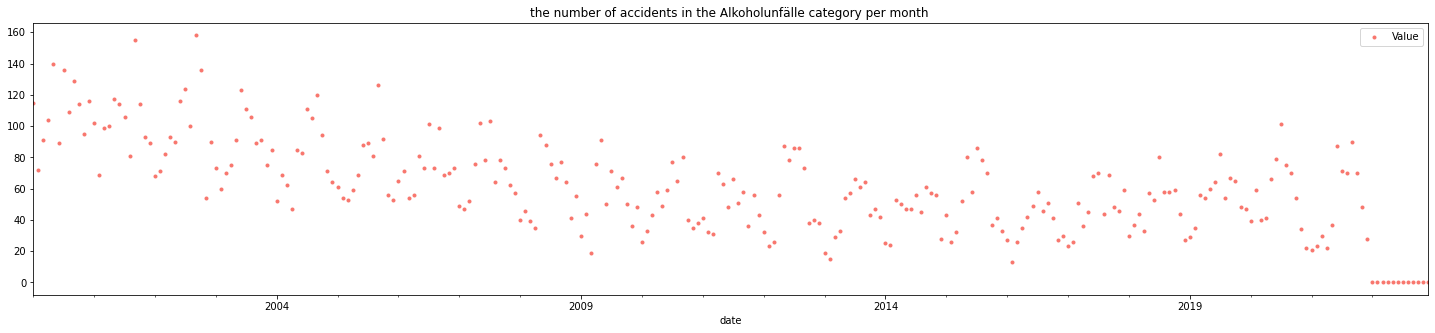

In [154]:
Total_accidents_Alkoholunfälle_Month =Total_accidents_Alkoholunfälle_Month.set_index('date')
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = Total_accidents_Alkoholunfälle_Month.plot(style='.', figsize=(25,5), color=color_pal[0], title='the number of accidents in the Alkoholunfälle category per month ')

**the number of accidents in the Fluchtunfälle category per month**

In [157]:
Total_accidents_Fluchtunfälle_Month=Total_accidents_Per_Category_Month["Fluchtunfälle"].to_frame().reset_index()
Total_accidents_Fluchtunfälle_Month.head()

,date,Value
0,2000-01-01,869.0
1,2000-02-01,925.0
2,2000-03-01,1022.0
3,2000-04-01,891.0
4,2000-05-01,1155.0


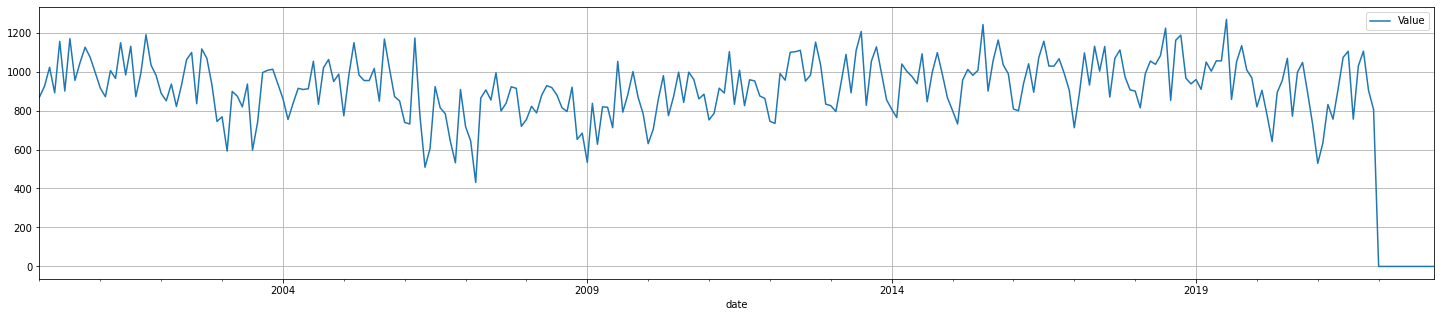

In [158]:
Total_accidents_Fluchtunfälle_Month.plot(x='date', y='Value' ,figsize=(25,5), grid=True)

**the number of accidents in the Verkehrsunfälle category per month**

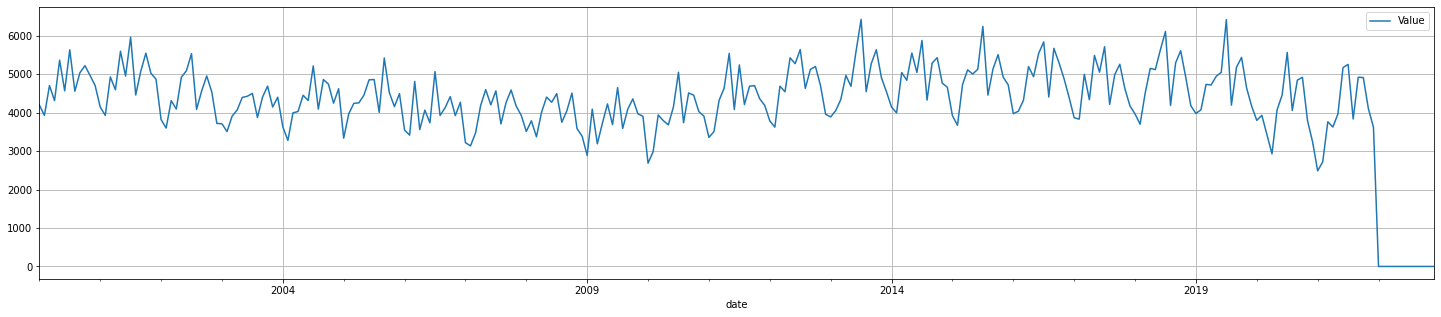

In [159]:
Total_accidents_Verkehrsunfälle_Month=Total_accidents_Per_Category_Month["Verkehrsunfälle"].to_frame().reset_index()
Total_accidents_Verkehrsunfälle_Month.plot(x='date', y='Value' ,figsize=(25,5), grid=True)

In [311]:
dummies = pd.get_dummies(df2.Category)
 
# Concatenate the dummies to original dataframe
merged = pd.concat([df2, dummies], axis='columns')

In [312]:
dummies2 = pd.get_dummies(df2.Type)
merged = pd.concat([merged, dummies2], axis='columns')

In [313]:
merged.drop(['Category','Type'], axis=1, inplace=True)

In [350]:
#Drop the records after 2020
split_date = '2020-01-01'
train = merged.loc[merged.index < split_date].copy().sort_values('date')
test = merged.loc[merged.index >= split_date].copy().sort_values('date')


In [355]:
test.dropna(inplace=True)
test

,Value,year,month,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle,Verletzte und Getötete,insgesamt,mit Personenschäden
date,,,,,,,,,
2020-01-01,11.0,2020,1,1,0,0,1,0,0
2020-01-01,28.0,2020,1,0,1,0,1,0,0
2020-01-01,360.0,2020,1,0,0,1,1,0,0
2020-01-01,791.0,2020,1,0,1,0,0,1,0
2020-01-01,301.0,2020,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
2021-12-01,788.0,2021,12,0,1,0,0,1,0
2021-12-01,7.0,2021,12,1,0,0,1,0,0
2021-12-01,2997.0,2021,12,0,0,1,0,1,0


In [320]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
   # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    df['Alkoholunfälle'] = df['Alkoholunfälle']
    df['Fluchtunfälle'] = df['Fluchtunfälle']
    df['Verkehrsunfälle'] = df['Verkehrsunfälle']
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','Alkoholunfälle','Fluchtunfälle','Verkehrsunfälle','Verletzte und Getötete','insgesamt','mit Personenschäden']]
    if label:
        y = df[label]
        return X, y
    return X

In [358]:
X_train, y_train = create_features(train, label='Value')
X_test, y_test = create_features(test, label='Value')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [359]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [360]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

[16:57:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

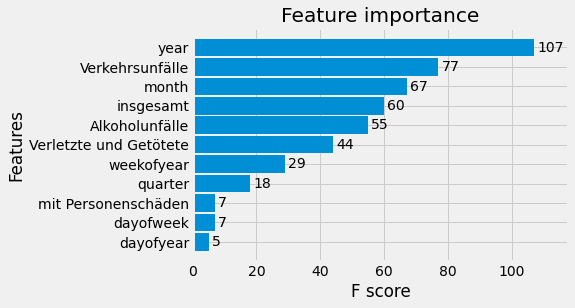

In [324]:
_ = plot_importance(reg, height=0.9)


In [371]:
test['Value_predictions'] = reg.predict(X_test)
df_all = pd.concat([test, train], sort=False)

In [372]:
test['error'] = test['Value'] - test['Value_predictions']
test['abs_error'] = test['error'].apply(np.abs)
error_by_day = test.groupby(['year','month','dayofmonth']) \
    .mean()[['Value','Value_predictions','error','abs_error']]

In [329]:
error_by_day.sort_values('abs_error', ascending=True).head(20)


Value  Value_predictions       error   abs_error
year month dayofmonth                                                       
2020 5     1           718.857143         709.473816    9.383313   28.950471
2021 3     1           660.571429         675.213196  -14.641770   29.705177
     11    1           722.571429         694.929810   27.641649   32.177232
     5     1           702.285714         709.473816   -7.188115   42.387978
2020 11    1           674.285714         694.929810  -20.644065   53.707472
     8     1           700.428571         709.473816   -9.045258   62.957934
2021 4     1           629.428571         694.944031  -65.515481   66.471884
2020 3     1           606.571429         675.213196  -68.641770   68.715563
2021 12    1           636.285714         694.929810  -58.644065   69.993186
2020 2     1           699.285714         625.192505   74.093180   74.093180
     6     1           784.857143         709.473816   75.383313   75.383313
2021 8     1           666.142857         709.473816  -43.330972   76.522962
2020 12    1           570.142857         694.929810 -124.786922  124.786922
     9     1           845.000000         709.473816  135.526170  135.526170
2021 2     1           482.571429         625.192505 -142.621106  142.621106
2020 10    1           860.428571         709.473816  150.954742  150.954742
2021 9     1           863.142857         709.473816  153.669028  153.669028
     10    1           869.857143         709.473816  160.383313  160.383313
     1     1           433.857143         610.648499 -176.791339  176.791339
2020 4     1           515.714286         694.944031 -179.229767  179.229767

predict
* Category: 'Alkoholunfälle'
* Type: 'insgesamt
* Year: '2021'
* Month: '01'

In [ ]:
date_time_obj = datetime.strptime("2101", '%y%m')
date_time_obj

In [332]:
#           date Value	year	month	Alkoholunfälle	Fluchtunfälle	Verkehrsunfälle	Verletzte und Getötete	insgesamt	mit Personenschäden
row=[date_time_obj,"2021","01",1,0,0,0,1,0]

In [375]:
predictions_202101=df_all.loc["2021-01-01"]
predictions_202101

,Value,year,month,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle,Verletzte und Getötete,insgesamt,mit Personenschäden,date,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,Value_predictions
date,,,,,,,,,,,,,,,,
2021-01-01,8.0,2021,1,0,1,0,1,0,0,2021-01-01,4,1,1,1,53,32.741726
2021-01-01,16.0,2021,1,1,0,0,0,1,0,2021-01-01,4,1,1,1,53,33.527813
2021-01-01,521.0,2021,1,0,1,0,0,1,0,2021-01-01,4,1,1,1,53,748.278076
2021-01-01,177.0,2021,1,0,0,1,1,0,0,2021-01-01,4,1,1,1,53,275.297668
2021-01-01,5.0,2021,1,1,0,0,1,0,0,2021-01-01,4,1,1,1,53,13.718276
2021-01-01,2153.0,2021,1,0,0,1,0,1,0,2021-01-01,4,1,1,1,53,2919.453125
2021-01-01,157.0,2021,1,0,0,1,0,0,1,2021-01-01,4,1,1,1,53,251.522690


In [376]:
My_prediction=predictions_202101.loc[ (predictions_202101['Alkoholunfälle'] == 1 )&( predictions_202101['insgesamt'] == 1)]
My_prediction

,Value,year,month,Alkoholunfälle,Fluchtunfälle,Verkehrsunfälle,Verletzte und Getötete,insgesamt,mit Personenschäden,date,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,Value_predictions
date,,,,,,,,,,,,,,,,
2021-01-01,16.0,2021,1,1,0,0,0,1,0,2021-01-01,4,1,1,1,53,33.527813


In [381]:
My_prediction[["Value","Value_predictions"]]

,Value,Value_predictions
date,,
2021-01-01,16.0,33.527813
